# Import Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io, exposure

# Histogram

Histogram adalah grafik yang menggambarkan frekuensi kemunculan unuk setian rentang nilai keabuan pada sebuah citra. Histogram digunakan untuk melihat tingkat kecerahan, kontras, dan informasi lain secara kualitatif maupun kuantitatif. 

## Histogram Citra Abu-abu

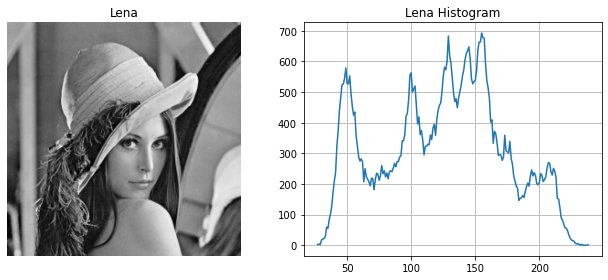

In [2]:
lena_gray = io.imread("../test_images/lena_gray.bmp")
hist, bins_centers = exposure.histogram(lena_gray)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(9, 4))

ax[0].imshow(lena_gray, cmap=plt.cm.gray)
ax[0].set_title("Lena")
ax[0].axis("off")

ax[1].set_title("Lena Histogram")
ax[1].plot(bins_centers, hist)
ax[1].grid();

## Histogram Citra Berwarna (RGB)

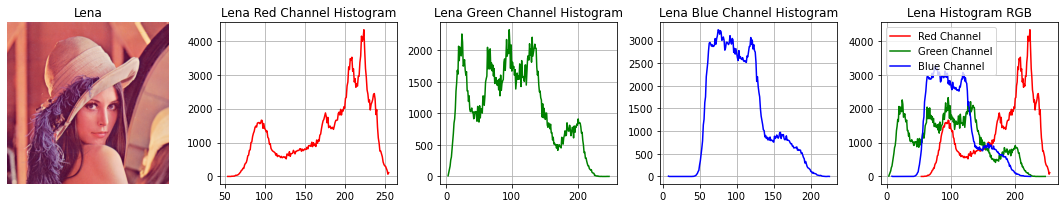

In [3]:
lena_rgb = io.imread("../test_images/lena_rgb.bmp")
red_channel_hist, red_channel_bin_center = exposure.histogram(lena_rgb[:, :, 0])
green_channel_hist, green_channel_bin_center = exposure.histogram(lena_rgb[:, :, 1])
blue_channel_hist, blue_channel_bin_center = exposure.histogram(lena_rgb[:, :, 2])

fig, ax = plt.subplots(nrows=1, ncols=5, tight_layout=True, figsize=(15, 3))

ax[0].imshow(lena_rgb)
ax[0].set_title("Lena")
ax[0].axis("off")

ax[1].set_title("Lena Red Channel Histogram")
ax[1].plot(red_channel_bin_center, red_channel_hist, "r-", label="Red Channel")
ax[1].grid()

ax[2].set_title("Lena Green Channel Histogram")
ax[2].plot(green_channel_bin_center, green_channel_hist, "g-", label="Green Channel")
ax[2].grid()

ax[3].set_title("Lena Blue Channel Histogram")
ax[3].plot(blue_channel_bin_center, blue_channel_hist, "b-", label="Blue Channel")
ax[3].grid()

ax[4].set_title("Lena Histogram RGB")
ax[4].plot(red_channel_bin_center, red_channel_hist, "r-", label="Red Channel")
ax[4].plot(green_channel_bin_center, green_channel_hist, "g-", label="Green Channel")
ax[4].plot(blue_channel_bin_center, blue_channel_hist, "b-", label="Blue Channel")
ax[4].legend()
ax[4].grid()

C:\ProgramData\Miniconda3\envs\image_processing\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


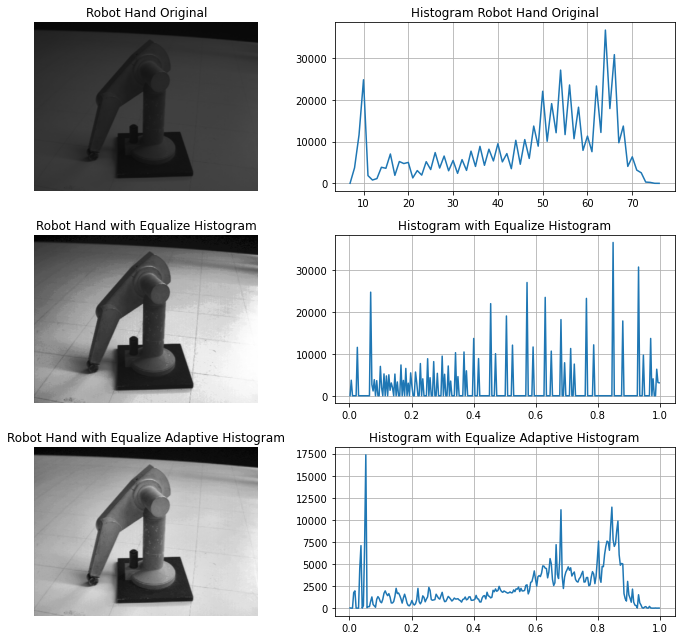

In [4]:
robot_hand = io.imread("../test_images/robot_hand.gif", plugin="matplotlib")
robot_hand = robot_hand[:, :, (0, 1, 2)]
robot_hand_hist, robot_hand_bins_center = exposure.histogram(robot_hand)

robot_hand_with_equalize_hist = exposure.equalize_hist(robot_hand)
robot_hand_equalize_hist, robot_hand_bins_center_equalize = exposure.histogram(robot_hand_with_equalize_hist)

robot_hand_with_equalize_adapt_hist = exposure.equalize_adapthist(robot_hand)
robot_hand_equalize_adapt_hist, robot_hand_bins_center_equalize_adapt = exposure.histogram(robot_hand_with_equalize_adapt_hist)

fig, ax = plt.subplots(nrows=3, ncols=2, tight_layout=True, figsize=(10, 9))

ax[0][0].set_title("Robot Hand Original")
ax[0][0].imshow(robot_hand, cmap=plt.cm.gray)
ax[0][0].axis("off")

ax[0][1].set_title("Histogram Robot Hand Original")
ax[0][1].plot(robot_hand_bins_center, robot_hand_hist)
ax[0][1].grid()

ax[1][0].set_title("Robot Hand with Equalize Histogram")
ax[1][0].imshow(robot_hand_with_equalize_hist, cmap=plt.cm.gray)
ax[1][0].axis("off")

ax[1][1].set_title("Histogram with Equalize Histogram")
ax[1][1].plot(robot_hand_bins_center_equalize, robot_hand_equalize_hist)
ax[1][1].grid()

ax[2][0].set_title("Robot Hand with Equalize Adaptive Histogram")
ax[2][0].imshow(robot_hand_with_equalize_adapt_hist, cmap=plt.cm.gray)
ax[2][0].axis("off")

ax[2][1].set_title("Histogram with Equalize Adaptive Histogram")
ax[2][1].plot(robot_hand_bins_center_equalize_adapt, robot_hand_equalize_adapt_hist)
ax[2][1].grid()

(-0.5, 255.5, 255.5, -0.5)

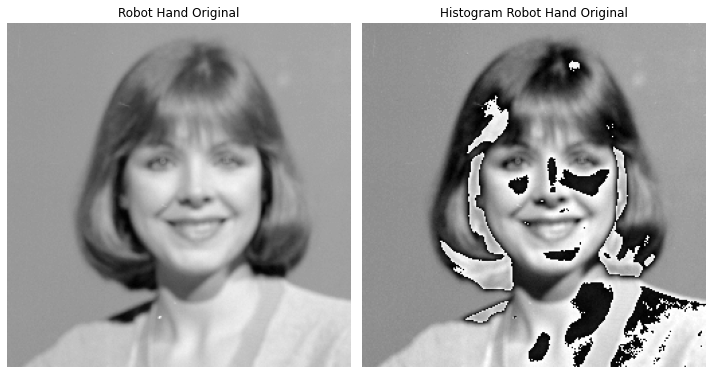

In [5]:
def contrast_stretching(image, low_value, high_value):
    image_copy = image.copy()
    low_graylevel = 0
    high_graylevel = 255
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            image_copy[row, column] = (image_copy[row, column] - low_value) * ((high_graylevel - low_graylevel) / (high_value - low_value)) + low_graylevel
            
    return image_copy

woman = io.imread("../test_images/woman.gif")
woman_with_contrast_stretching = contrast_stretching(woman, 77, 132)

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(10, 9))

ax[0].set_title("Robot Hand Original")
ax[0].imshow(woman, cmap=plt.cm.gray)
ax[0].axis("off")

ax[1].set_title("Histogram Robot Hand Original")
ax[1].imshow(woman_with_contrast_stretching, cmap=plt.cm.gray)
ax[1].axis("off")

In [6]:
np.percentile(woman, 95)

132.0

In [7]:
woman

array([[107, 107, 108, ..., 113, 113, 113],
       [108, 108, 108, ..., 112, 112, 112],
       [108, 109, 108, ..., 113, 113, 113],
       ...,
       [108, 107, 108, ..., 126, 126, 126],
       [108, 108, 107, ..., 126, 126, 126],
       [108, 109, 108, ..., 127, 128, 126]], dtype=uint8)

In [8]:
woman.min()

55

In [9]:
woman_with_contrast_stretching.max()

255

In [10]:
woman_with_contrast_stretching.min()

0